In [66]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data= "city_data.csv"
ride_data = "ride_data.csv"

ride_df = pd.read_csv(ride_data)
city_df = pd.read_csv(city_data)

merge_df = pd.merge(ride_df, city_df, on="city", how="left")
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


Text(42,35,'Note:\nCircle size correlates to driver count per city.')

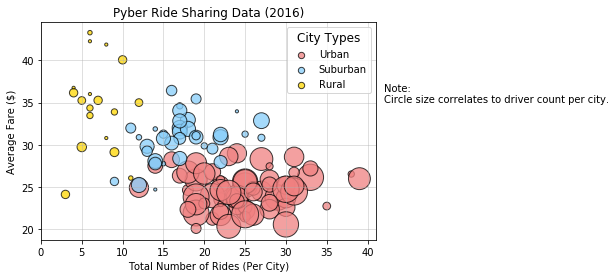

In [67]:
# Obtain the x and y coordinates for each of the three city types
rural_df = merge_df.loc[merge_df['type'] == "Rural"]
suburban_df = merge_df.loc[merge_df['type'] == "Suburban"]
urban_df = merge_df.loc[merge_df['type'] == "Urban"]
rural_groupby_city = rural_df.groupby(['city'])
suburban_groupby_city = suburban_df.groupby(['city'])
urban_groupby_city = urban_df.groupby(['city'])

rural_rides_per_city = rural_groupby_city.ride_id.count()
suburban_rides_per_city = suburban_groupby_city.ride_id.count()
urban_rides_per_city = urban_groupby_city.ride_id.count()

rural_total_fares_per_city = rural_groupby_city.fare.sum()
suburban_total_fares_per_city = suburban_groupby_city.fare.sum()
urban_total_fares_per_city = urban_groupby_city.fare.sum()

rural_avg_fare_per_city = rural_total_fares_per_city / rural_rides_per_city
suburban_avg_fare_per_city = suburban_total_fares_per_city / suburban_rides_per_city
urban_avg_fare_per_city = urban_total_fares_per_city / urban_rides_per_city
city_df = city_df.set_index(['city'])
city_sorted_df = city_df.sort_index()

rural_city_df = city_sorted_df.loc[city_sorted_df['type'] == "Rural"]
suburban_city_df = city_sorted_df.loc[city_sorted_df['type'] == "Suburban"]
urban_city_df = city_sorted_df.loc[city_sorted_df['type'] == "Urban"]

rural_bubble_sizes = rural_city_df['driver_count'] * 10
suburban_bubble_sizes = suburban_city_df['driver_count'] * 10
urban_bubble_sizes = urban_city_df['driver_count'] * 10

urban_handle = plt.scatter(urban_rides_per_city, urban_avg_fare_per_city, marker="o", c='lightcoral', edgecolors="black", s=urban_bubble_sizes, alpha=0.75, label="Urban")
suburban_handle = plt.scatter(suburban_rides_per_city, suburban_avg_fare_per_city, marker="o", c='lightskyblue', edgecolors="black", s=suburban_bubble_sizes, alpha=0.75, label="Suburban")
rural_handle = plt.scatter(rural_rides_per_city, rural_avg_fare_per_city, marker="o", c='gold', edgecolors="black", s=rural_bubble_sizes, alpha=0.75, label="Rural")

plt.ylim(18.75, 44.5)
plt.xlim(0, 41)
plt.grid(axis='both', alpha=0.5)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
lgnd.set_title("City Types", prop = {'size':'large'})

plt.text(x=42, y=35, s='Note:\nCircle size correlates to driver count per city.')


In [51]:
#group data for the first two piechart data
city_notype_df = pd.DataFrame(merge_df)
city_notype_df = merge_df.groupby(["type"])
city_type_df = round(city_notype_df.fare.agg(["count","sum","mean"]),0)

city_type_df.columns = ["Number of Rides", 
                        "Total Revenue of Fares", 
                        "Average Fare per Ride"]

city_type_df["% of Total Rides"] = round(city_type_df["Number of Rides"] / sum(city_type_df["Number of Rides"]) * 100, 2)
city_type_df["% of Total Fares"] = round(city_type_df["Total Revenue of Fares"] / sum(city_type_df["Total Revenue of Fares"]) * 100, 2)
city_type_df.head(5)

,Number of Rides,Total Revenue of Fares,Average Fare per Ride,% of Total Rides,% of Total Fares
type,,,,,
Rural,125,4328.0,35.0,5.26,6.81
Suburban,625,19356.0,31.0,26.32,30.46
Urban,1625,39854.0,25.0,68.42,62.72


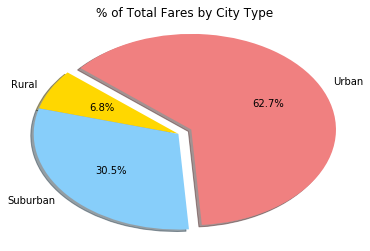

In [42]:
#Total Fares by City Type
labels = city_type_df.index.values
sizes =city_type_df["% of Total Fares"]
colors = ['gold','lightskyblue','lightcoral']
explode = [0,0,0.1]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("tight")
plt.title('% of Total Fares by City Type')
plt.show()


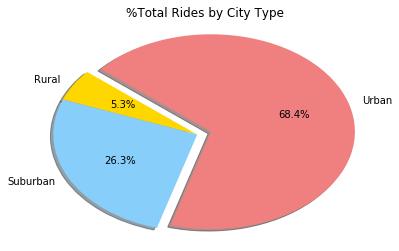

In [37]:
#Total Rides by City Type
labels = city_type_df.index.values
sizes =city_type_df["% of Total Rides"]
colors = ['gold','lightskyblue','lightcoral']
explode = [0,0,0.1]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("tight")
plt.title('%Total Rides by City Type')
plt.show()


Text(0.5,1,'%Total Drivers by City Type')

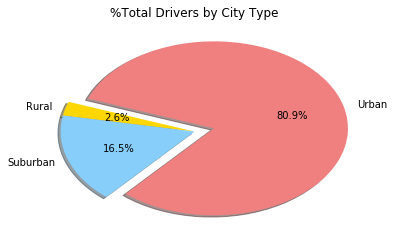

In [63]:
#Total Drivers by City Type
rural_drivers = rural_city_df['driver_count'].sum()
suburban_drivers = suburban_city_df['driver_count'].sum()
urban_drivers = urban_city_df['driver_count'].sum()
total_drivers = rural_drivers + suburban_drivers + urban_drivers

rural_rides_percent = (rural_drivers * 100) / total_drivers
suburban_rides_percent = (suburban_drivers * 100) / total_drivers
urban_rides_percent = (urban_drivers * 100) / total_drivers

labels = ["Rural", "Suburban", "Urban"]
sizes = [2.6, 16.5, 80.9]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.15)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title('%Total Drivers by City Type')
